In [33]:
from google.colab import files 
import io
uploaded = files.upload()


Saving hotel_bookings.csv to hotel_bookings.csv


In [0]:
import pandas as pd

In [41]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [42]:
df.shape

(119390, 32)

In [46]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [63]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [74]:
df.is_canceled.unique()

array([0, 1])

In [50]:
df.sort_values(by=['arrival_date_year'],ascending=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
19240,Resort Hotel,0,4,2015,December,50,11,0,2,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,48.00,0,0,Check-Out,2015-12-13
19239,Resort Hotel,0,3,2015,December,50,10,0,0,2,0.0,1,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,0.00,0,2,Check-Out,2015-12-10
41873,City Hotel,0,1,2015,August,35,25,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Contract,156.00,0,2,Check-Out,2015-08-27
41874,City Hotel,1,12,2015,August,35,25,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,12.00,0,1,Canceled,2015-08-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64927,City Hotel,1,56,2017,March,12,21,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,86.0,NaN,0,Transient,85.00,0,0,Canceled,2017-01-24
64926,City Hotel,1,56,2017,March,12,21,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,86.0,NaN,0,Transient,85.00,0,0,Canceled,2017-01-24
64925,City Hotel,1,56,2017,March,12,21,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,86.0,NaN,0,Transient,85.00,0,0,Canceled,2017-01-24
64923,City Hotel,1,111,2017,March,12,20,4,10,1,0.0,0,BB,AGO,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,78.26,0,0,No-Show,2017-03-20


In [56]:
minim=df['arrival_date_year'].min()
maxim=df['arrival_date_year'].max()
print(minim,'-',maxim)

2015 - 2017


In [81]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [60]:
año1=df.loc[df['arrival_date_year']==2015].shape[0]
año2=df.loc[df['arrival_date_year']==2016].shape[0]
año3=df.loc[df['arrival_date_year']==2017].shape[0]
print('en 2015 hubo {} reservas, en 2016 hubo {} reservas y en 2017 hubo {} reservas'.format(año1,año2,año3))

en 2015 hubo 21996 reservas, en 2016 hubo 56707 reservas y en 2017 hubo 40687 reservas


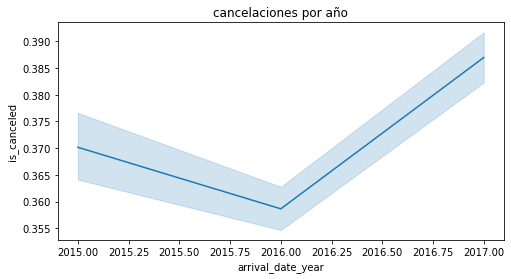

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax = sns.lineplot(x="arrival_date_year", y="is_canceled", data=df)
ax.set_title('cancelaciones por año')
plt.show()

In [71]:
df_meses = df.groupby(by=['arrival_date_month'])
df_meses.mean()
df[['arrival_date_month','is_canceled','stays_in_weekend_nights','stays_in_week_nights']]

,arrival_date_month,is_canceled,stays_in_weekend_nights,stays_in_week_nights
0,July,0,0,0
1,July,0,0,0
2,July,0,0,1
3,July,0,0,1
4,July,0,0,2
...,...,...,...,...
119385,August,0,2,5
119386,August,0,2,5
119387,August,0,2,5
119388,August,0,2,5


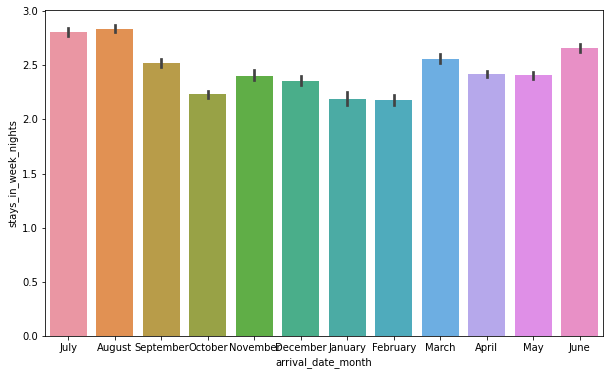

In [84]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="arrival_date_month", y="stays_in_week_nights", data=df)
plt.show()

In [85]:
import pandas as pd
from google.colab import files
import os

root_folder = '/content/gdrive/My Drive/data_course'
for kfolder in os.listdir(root_folder):
    print('-------- Folder: {}'.format(kfolder))
    full_path = os.path.join(root_folder, kfolder)    
    for root, dirs, files in os.walk(full_path):
        for filename in files:
            print(filename)
            file_path = os.path.join(full_path, filename)  
            if (filename.endswith('.csv')):
                df = pd.read_csv(file_path, engine='python')
                print('csv contents data size {}'.format(df.shape))
            elif (filename.endswith('.xls')) | (filename.endswith('.xlsx')):
                print(filename)
                df = pd.read_csv(file_path, engine='python')
                print('excel contents data size {}'.format(df.shape))

-------- Folder: titanic
test.csv
csv contents data size (418, 11)
gender_submission.csv
csv contents data size (418, 2)
train.csv
csv contents data size (891, 12)
-------- Folder: mpg_cars
auto-mpg.csv
csv contents data size (398, 9)
-------- Folder: boston_crime
crime.csv
csv contents data size (327820, 17)
-------- Folder: hotel
hotel_bookings.csv
csv contents data size (119390, 32)
